In [1]:
# first we do a XOR with LIF neurons

In [1]:
!pip install nengo
!pip install numpy
!pip install sklearn
!pip install  matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo

In [2]:
class SimpleNeuron:
    def __init__(self):
        self.v = 0
    def step(self, J):
        self.v += J
        if self.v < 0:
            self.v = 0
        if self.v > 5:
            spike = 1
            self.v = 0
        else:
            spike = 0
        return spike


In [3]:
def stim_func(t):
  if t<0.1:
    return 0,0
  elif t<0.2:
    return 0,1
  elif t<0.3:
    return 1,0
  else:
    return 1,1

In [4]:
time = np.linspace(0,0.4,400)

In [5]:
stim = [stim_func(time[i]) for i in range(len(time))]

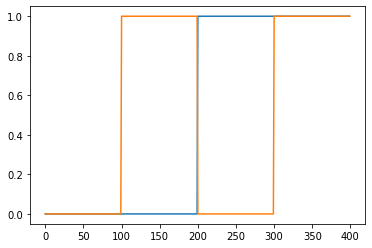

In [6]:
plt.plot(stim)

In [7]:
N = 500  # how many neurons there are
dimensions = 2
neurons = [SimpleNeuron() for i in range(N)]
E = np.random.normal(size=(500, dimensions))
B = np.random.normal(size=(N))*0.1

A = np.zeros((len(stim), N))
for i, J in enumerate(stim):
    Js = np.dot(E, J)
    for k, JJ in enumerate(Js):
        A[i,k] = neurons[k].step(JJ+B[k])

In [30]:
A[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
def target_func(stim):
  if stim[0]==stim[1]:
     return 0
  else:
    return 1

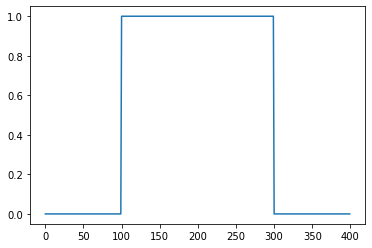

In [9]:
target = [target_func(s) for s in stim] 
plt.plot(target)

In [10]:
filt = nengo.synapses.Lowpass(0.01)
D, info = nengo.solvers.LstsqL2()(filt.filt(A), target)

In [17]:
print(info)

{'rmses': 0.10229879762604602, 'time': 0.045226335525512695}


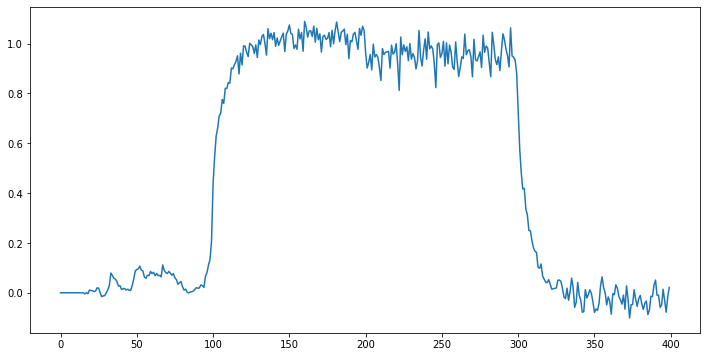

In [11]:
plt.figure(figsize=(12,6))
plt.plot(filt.filt(A.dot(D)), label='output (filtered)')

In [23]:
def stim_func_2(t):
  if t<0.1:
    return 0,1
  elif t<0.2:
    return 0,1
  elif t<0.3:
    return 0,1
  else:
    return 1,1

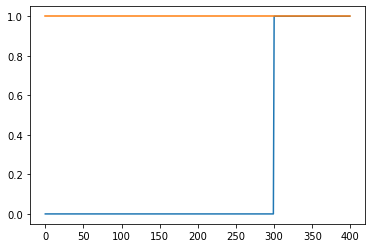

In [24]:
stim = [stim_func_2(time[i]) for i in range(len(time))]
plt.plot(stim)

In [25]:
A = np.zeros((len(stim), N))
for i, J in enumerate(stim):
    Js = np.dot(E, J)
    for k, JJ in enumerate(Js):
        A[i,k] = neurons[k].step(JJ+B[k])

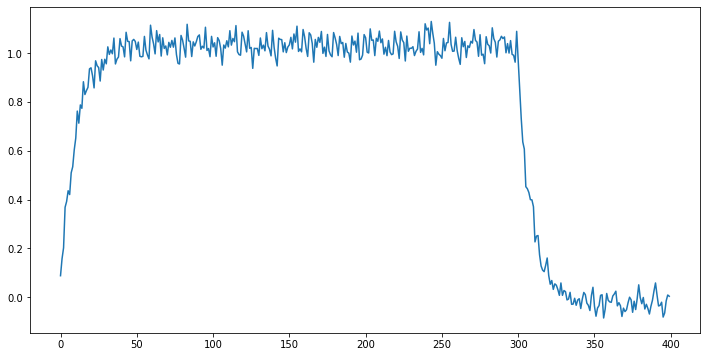

In [26]:
plt.figure(figsize=(12,6))
plt.plot(filt.filt(A.dot(D)), label='output (filtered)')

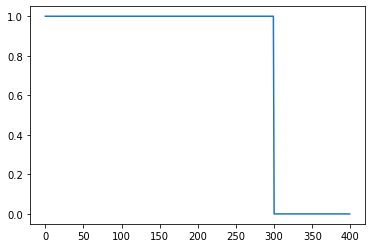

In [27]:
target = [target_func(s) for s in stim] 
plt.plot(target)